In [5]:
# Librerias requeridas
import tensorflow as tf  
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random

# Prueba si TF reconoce el GPU
print("GPU's disponibles: ", len(tf.config.list_physical_devices('GPU')))

GPU's disponibles:  1


In [6]:
# Importa el dataset mnist
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normaliza los valores de los pixeles entre 0-1
x_train = x_train/255.0  
x_test = x_test/255.0  

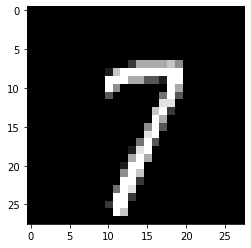

In [25]:
# Muestra una de las imagenes del dataset de forma aleatoria
plt.imshow(x_train[random.randint(0, len(x_train))], cmap="gray")

In [33]:

# La primera capa de la Red Neuronal tiene que ser de 784 neuronas (28*28)
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
# Se reduce a 64 neuronas 
encoder_output = keras.layers.Dense(64, activation="relu")(x)

# se define el modelo
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

# Se define el decodificador
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
# Layer de output de misma dimension que el input
x = keras.layers.Dense(784, activation="relu")(decoder_input)
# Se ajusta a la forma de los pixeles de la imagen
decoder_output = keras.layers.Reshape((28, 28, 1))(x)



In [23]:
# se define el optimizador
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Se define el autoencoder desde input hasta output
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

autoencoder.compile(opt, loss='mse')



Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 784)               50960     
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

In [26]:
# Se entrena el modelo en 5 epochs y batches de 16 imagenes

epochs=5

for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=16, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")


3375/3375 [==============================] - 4s 1ms/step - loss: 0.0106 - val_loss: 0.0104
INFO:tensorflow:Assets written to: models/AE-1.model/assets
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0102 - val_loss: 0.0100
INFO:tensorflow:Assets written to: models/AE-2.model/assets
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0100 - val_loss: 0.0100
INFO:tensorflow:Assets written to: models/AE-3.model/assets
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0098 - val_loss: 0.0099
INFO:tensorflow:Assets written to: models/AE-4.model/assets
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0098 - val_loss: 0.0097
INFO:tensorflow:Assets written to: models/AE-5.model/assets


In [27]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
print(example[0].shape)
print(example[0])

(64,)
[0.83867794 1.2491418  1.3113685  2.2947154  1.1435788  2.6750157
 0.6586572  0.8805635  0.92221445 1.2250199  1.7284172  1.3305552
 0.01087612 1.0941266  2.016294   1.0072619  1.3780513  1.7237071
 0.60228044 1.1082274  0.31841505 0.81731415 2.6309125  1.5924144
 1.2319001  0.6324132  0.07555449 0.80470604 1.2298982  0.05786511
 1.6724875  0.7536601  1.7581221  1.0924345  0.         1.8184744
 1.2780976  1.5051448  1.0484746  0.         0.6683581  0.75636876
 0.45408103 1.1076896  0.80110276 0.         1.5009041  1.2352104
 0.6796894  0.5467358  2.3804157  0.09047517 1.9284433  1.3974358
 0.5879513  0.9887193  0.8731303  1.7986318  0.53575796 2.0789847
 2.429594   0.32133776 1.2636945  1.4562923 ]


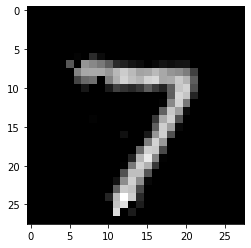

In [28]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0], cmap="gray")